In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [20]:
df= pd.read_csv('Data/human_liver.tsv',sep='\t')

In [21]:
df

,genes,GSM742944,GSM2326089,GSM1807974,GSM1807990,GSM2055788,GSM2142335,GSM1807979,GSM1695909,GSM1554468,...,GSM2653842,GSM2653843,GSM2653844,GSM2653845,GSM2653846,GSM2653847,GSM2653849,GSM2653850,GSM2653851,GSM2653853
0,A1BG,0,92,11663,2089,18808,183,5123,79640,1595,...,30,22,17,49,394,12,8,6,10,8
1,A1CF,0,17,5738,490,14035,5,7127,10168,241,...,9,4,15,19,105,5,8,4,2,24
2,A2M,6362,304,39269,8299,20260,97,27210,63297,5817,...,8,6,2,0,374,0,4,1,3,1
3,A2ML1,0,22,11,2,39,8,4,9,5,...,4,5,1,4,1,6,3,3,3,1
4,A2MP1,0,3,167,7,44,15,16,61,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35233,BP-2171C21.4,0,0,0,0,0,0,0,1,0,...,15,17,13,8,2,0,0,0,0,0
35234,BP-2171C21.5,0,0,0,0,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35235,BP-2171C21.6,0,4,1,0,1,6,1,1,0,...,0,0,0,0,2,1,0,0,0,1
35236,BP-2189O9.2,0,25,6,0,48,110,2,1,0,...,0,0,0,1,1,0,0,0,0,0


In [22]:
df.describe()

,GSM742944,GSM2326089,GSM1807974,GSM1807990,GSM2055788,GSM2142335,GSM1807979,GSM1695909,GSM1554468,GSM1695910,...,GSM2653842,GSM2653843,GSM2653844,GSM2653845,GSM2653846,GSM2653847,GSM2653849,GSM2653850,GSM2653851,GSM2653853
count,35238.000000,35238.000000,35238.000000,35238.000000,3.523800e+04,3.523800e+04,35238.000000,3.523800e+04,3.523800e+04,3.523800e+04,...,35238.000000,35238.000000,35238.000000,35238.000000,35238.000000,35238.000000,35238.000000,35238.000000,35238.000000,35238.000000
mean,9.136245,1499.294171,473.682473,82.726971,4.680936e+02,5.455975e+02,280.928174,1.572038e+03,3.197678e+02,1.868345e+03,...,263.425081,309.203956,274.975793,223.136756,285.950338,331.646518,252.818435,236.785118,255.980220,171.877178
std,211.284156,8817.639459,3415.314857,1193.182428,7.613447e+03,1.129007e+04,2608.339591,2.874910e+04,1.646059e+04,3.347379e+04,...,4790.360463,5602.079608,5172.775958,3522.790188,5829.147664,5599.932311,4414.841187,4166.606616,4953.502245,2342.670803
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,6.000000,2.000000,0.000000,9.000000e+00,3.000000e+00,1.000000,4.000000e+00,1.000000e+00,1.000000e+01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,971.000000,261.000000,6.000000,2.020000e+02,2.190000e+02,116.000000,3.360000e+02,7.400000e+01,6.960000e+02,...,23.000000,26.000000,25.000000,23.000000,27.000000,32.000000,26.000000,25.000000,24.000000,19.000000
max,22408.000000,705513.000000,241197.000000,99555.000000,1.150608e+06,1.301560e+06,253141.000000,3.790127e+06,2.720028e+06,2.743026e+06,...,659826.000000,767650.000000,696810.000000,401450.000000,780342.000000,611809.000000,524351.000000,502451.000000,655338.000000,177541.000000


In [23]:
df.columns

Index(['genes', 'GSM742944', 'GSM2326089', 'GSM1807974', 'GSM1807990',
       'GSM2055788', 'GSM2142335', 'GSM1807979', 'GSM1695909', 'GSM1554468',
       ...
       'GSM2653842', 'GSM2653843', 'GSM2653844', 'GSM2653845', 'GSM2653846',
       'GSM2653847', 'GSM2653849', 'GSM2653850', 'GSM2653851', 'GSM2653853'],
      dtype='object', length=904)

In [24]:
df.shape

(35238, 904)

In [37]:
df1= df.drop('genes',axis=1)

In [38]:
df1

,GSM742944,GSM2326089,GSM1807974,GSM1807990,GSM2055788,GSM2142335,GSM1807979,GSM1695909,GSM1554468,GSM1695910,...,GSM2653842,GSM2653843,GSM2653844,GSM2653845,GSM2653846,GSM2653847,GSM2653849,GSM2653850,GSM2653851,GSM2653853
0,0,92,11663,2089,18808,183,5123,79640,1595,23761,...,30,22,17,49,394,12,8,6,10,8
1,0,17,5738,490,14035,5,7127,10168,241,10738,...,9,4,15,19,105,5,8,4,2,24
2,6362,304,39269,8299,20260,97,27210,63297,5817,85187,...,8,6,2,0,374,0,4,1,3,1
3,0,22,11,2,39,8,4,9,5,32,...,4,5,1,4,1,6,3,3,3,1
4,0,3,167,7,44,15,16,61,2,484,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35233,0,0,0,0,0,0,0,1,0,0,...,15,17,13,8,2,0,0,0,0,0
35234,0,0,0,0,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35235,0,4,1,0,1,6,1,1,0,16,...,0,0,0,0,2,1,0,0,0,1
35236,0,25,6,0,48,110,2,1,0,39,...,0,0,0,1,1,0,0,0,0,0


In [39]:
df1 = df1.values.transpose()
df1.shape

(903, 35238)

In [40]:
# Standradize
sc= StandardScaler()
df1= sc.fit_transform(df1)

In [41]:
pca = PCA(n_components=2)
x_pca= pca.fit_transform(df1.copy())

In [42]:
x_pca

array([[ -67.9080145 ,    2.88904245],
       [ 371.7820751 , -133.46680954],
       [  38.35319593,  -11.91127944],
       ...,
       [ -36.30488889,   -8.157077  ],
       [ -35.80987968,   -9.3521995 ],
       [ -45.61920126,   -4.12469002]])

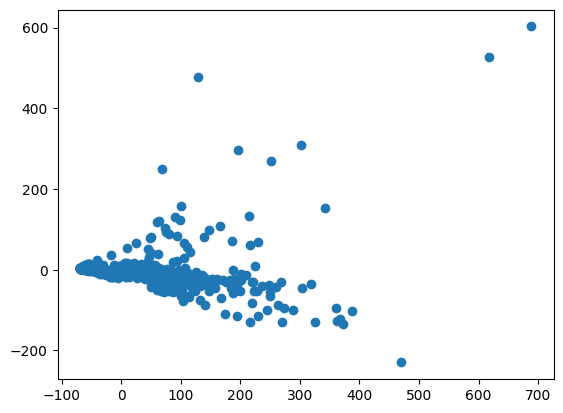

In [43]:
plt.scatter(x=x_pca[:,0],y=x_pca[:,1])

plt.show()

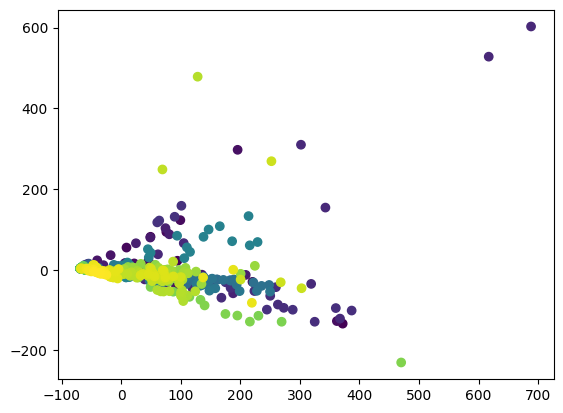

In [45]:
# scatter plot with respect to rows amd color
plt.scatter(x=x_pca[:,0],y=x_pca[:,1],c=range(903), cmap='viridis')
plt.show()

In [46]:
# t-SNE
tsne= TSNE(n_components=2)
x_tsne= tsne.fit_transform(df1)

In [47]:
x_tsne

array([[-7.244682 , -1.2507099],
       [21.02113  ,  6.3104825],
       [ 9.658173 ,  2.7128663],
       ...,
       [-1.0021155,  8.143615 ],
       [-1.0004647,  8.144058 ],
       [-1.7324317,  6.6341815]], dtype=float32)

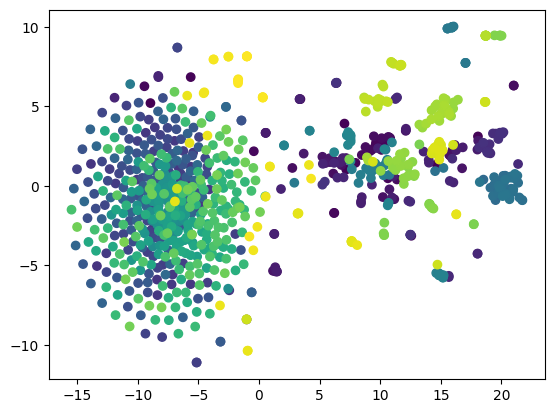

In [49]:
plt.scatter(x=x_tsne[:,0],y=x_tsne[:,1],c=range(903), cmap='viridis')
plt.show()